In [58]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

import sys
sys.path.append('../data')

import congress_db
from setup_db import Candidate, Contribution, Committee
session = congress_db.create_session()

In [59]:
from sqlalchemy import func

total_contributions = session.query(Candidate.name, func.sum(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_total, amounts_total = zip(*total_contributions)

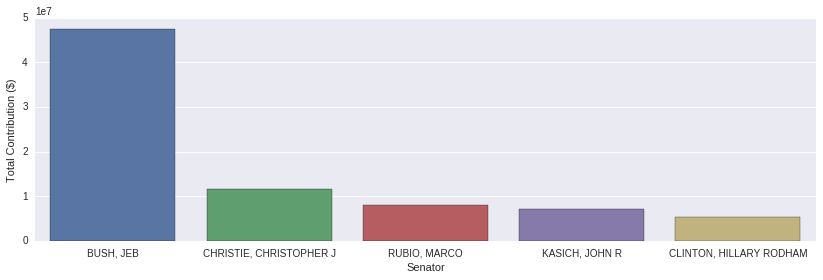

In [60]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_total[:5], amounts_total[:5])
plt.xlabel('Senator')
plt.ylabel('Total Contribution ($)')
plt.show()

In [61]:
mean_contributions = session.query(Candidate.name, func.avg(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_mean, amounts_mean = zip(*mean_contributions)

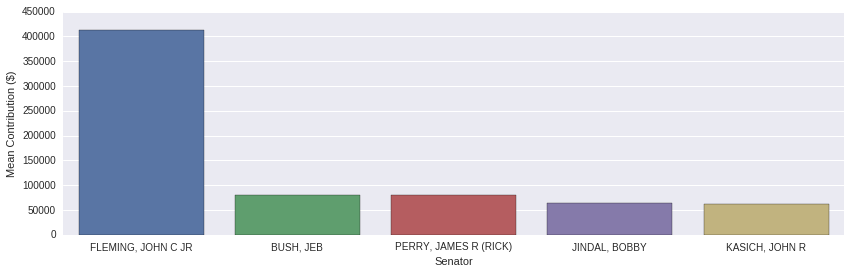

In [62]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_mean[:5], amounts_mean[:5])
plt.xlabel('Senator')
plt.ylabel('Mean Contribution ($)')
plt.show()

In [63]:
num_contributions = session.query(Candidate.name, func.count(Contribution.tx_amount).label('total')).\
                    join(Contribution.candidate).\
                    group_by(Candidate.name).\
                    order_by('total desc').\
                    all()

names_num, amounts_num = zip(*num_contributions)

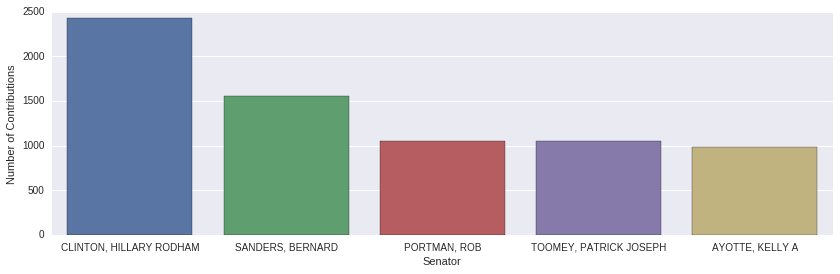

In [64]:
f = plt.figure(figsize=(14, 4))
sns.barplot(names_num[:5], amounts_num[:5])
plt.xlabel('Senator')
plt.ylabel('Number of Contributions')
plt.show()